In [1]:
import pandas as pd
import numpy as np
import re
import os
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots


import sklearn
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor


In [2]:
#from xgboost import XGBRegressor, XGBRFRegressor
#from catboost import CatBoostRegressor
#import catboost
import plotly.express as px
#import plotly.graph_objects as go

#from scipy.stats.mstats import winsorize

#from pyod.models.feature_bagging import FeatureBagging
#from pyod.models.lof import LOF



# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [3]:
#CSV to Load
rental_data= ("Resources/CFMR_df.csv")
rental_data_df=pd.read_csv(rental_data)
rental_data_df = rental_data_df.drop(['Unnamed: 0'], axis=1)
rental_data_df.head(300)

,State,Year,Studio,One Bedroom,Two Bedroom,Three Bedroom,Four Bedroom,Population,Percent Change
0,AK,2021,850.97,951.28,1200.14,1582.72,1815.38,25467.93,NaN
1,AL,2021,548.28,591.99,725.82,949.51,1094.63,72399.63,NaN
2,AR,2021,515.95,553.85,697.31,920.29,1065.15,39706.00,NaN
3,AS,2021,590.00,594.00,783.00,1121.00,1201.00,55519.00,NaN
4,AZ,2021,698.13,767.93,970.13,1340.20,1493.53,453995.67,NaN
...,...,...,...,...,...,...,...,...,...
275,VT,2022,785.91,869.83,1077.28,1387.28,1530.50,2449.48,NaN
276,WA,2022,794.72,899.13,1124.38,1563.41,1848.69,183845.77,NaN
277,WI,2022,597.74,667.40,853.43,1116.50,1242.57,80044.65,NaN
278,WV,2022,584.65,620.40,761.05,1003.47,1144.07,33397.00,NaN


In [4]:
rental_data_df.columns

Index(['State', 'Year', 'Studio', 'One Bedroom', 'Two Bedroom',
       'Three Bedroom', 'Four Bedroom', 'Population', 'Percent Change'],
      dtype='object')

In [5]:
rental_state_df = rental_data_df.sort_values(by=['State', 'Year'])

In [6]:
rental_state_df.head(10)

,State,Year,Studio,One Bedroom,Two Bedroom,Three Bedroom,Four Bedroom,Population,Percent Change
168,AK,2018,842.86,948.86,1183.59,1575.90,1848.17,24490.72,-0.01
112,AK,2019,863.97,977.31,1221.38,1623.93,1866.03,24490.72,0.03
56,AK,2020,902.24,1022.24,1276.03,1696.00,1926.31,25467.93,0.04
0,AK,2021,850.97,951.28,1200.14,1582.72,1815.38,25467.93,NaN
224,AK,2022,864.45,962.66,1236.45,1619.83,1890.34,25467.93,NaN
169,AL,2018,519.12,554.07,682.06,911.72,1050.61,71339.34,-0.01
113,AL,2019,530.30,569.61,697.54,925.31,1068.13,71339.34,0.02
57,AL,2020,533.90,575.87,700.64,924.25,1064.90,72399.63,0.00
1,AL,2021,548.28,591.99,725.82,949.51,1094.63,72399.63,NaN
225,AL,2022,586.07,627.84,773.81,1004.81,1154.52,72399.63,NaN


In [7]:
rental_state_df['mean'] = rental_state_df[["Studio", "One Bedroom", "Two Bedroom", "Three Bedroom", "Four Bedroom"]].mean(axis=1)

In [8]:
rental_state_df.head(10)

,State,Year,Studio,One Bedroom,Two Bedroom,Three Bedroom,Four Bedroom,Population,Percent Change,mean
168,AK,2018,842.86,948.86,1183.59,1575.90,1848.17,24490.72,-0.01,1279.876
112,AK,2019,863.97,977.31,1221.38,1623.93,1866.03,24490.72,0.03,1310.524
56,AK,2020,902.24,1022.24,1276.03,1696.00,1926.31,25467.93,0.04,1364.564
0,AK,2021,850.97,951.28,1200.14,1582.72,1815.38,25467.93,NaN,1280.098
224,AK,2022,864.45,962.66,1236.45,1619.83,1890.34,25467.93,NaN,1314.746
169,AL,2018,519.12,554.07,682.06,911.72,1050.61,71339.34,-0.01,743.516
113,AL,2019,530.30,569.61,697.54,925.31,1068.13,71339.34,0.02,758.178
57,AL,2020,533.90,575.87,700.64,924.25,1064.90,72399.63,0.00,759.912
1,AL,2021,548.28,591.99,725.82,949.51,1094.63,72399.63,NaN,782.046
225,AL,2022,586.07,627.84,773.81,1004.81,1154.52,72399.63,NaN,829.410


In [9]:
#Completed, Commited out to not be overwritten by accident
#rental_state_df.to_csv('ML3.csv')

In [10]:
#Filled all NaNs with accurate % changes via Excel, back with completed dataset
#CSV to Load
rental_data1= ("Resources/ML3.csv")
rental_data1_df=pd.read_csv(rental_data1)
rental_data1_df = rental_data1_df.drop(['Unnamed: 0'], axis=1)
rental_data1_df.head(300)

,State,Year,Studio,One Bedroom,Two Bedroom,Three Bedroom,Four Bedroom,Population,Percent Change
0,AK,2018,842.86,948.86,1183.59,1575.90,1848.17,24490.72,-0.01
1,AK,2019,863.97,977.31,1221.38,1623.93,1866.03,24490.72,0.03
2,AK,2020,902.24,1022.24,1276.03,1696.00,1926.31,25467.93,0.04
3,AK,2021,850.97,951.28,1200.14,1582.72,1815.38,25467.93,0.00
4,AK,2022,864.45,962.66,1236.45,1619.83,1890.34,25467.93,0.00
...,...,...,...,...,...,...,...,...,...
275,WY,2018,577.57,638.48,813.74,1096.74,1328.70,24505.48,0.06
276,WY,2019,591.70,650.91,825.35,1109.83,1375.43,24505.48,0.02
277,WY,2020,621.39,678.83,845.61,1138.26,1422.96,25356.52,0.02
278,WY,2021,640.09,676.70,842.09,1138.87,1412.91,25356.52,0.00


In [11]:
rental_data1_df.isnull().sum()

State             0
Year              0
Studio            0
One Bedroom       0
Two Bedroom       0
Three Bedroom     0
Four Bedroom      0
Population        0
Percent Change    0
dtype: int64

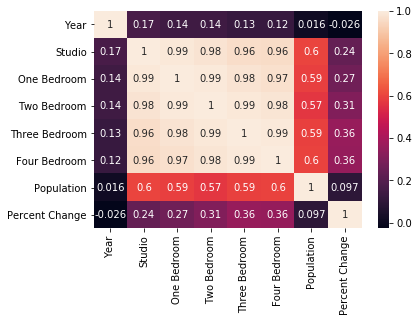

In [12]:
sns.heatmap(rental_data_df.corr(), annot=True)

In [13]:
# The heat map above tells us that year is not a great predictor of anything 
# Likely because we only have 5 years of data, only by year, not by month
# Population appears to be a modest predictor 

In [14]:
rental_data1_df['Studio'].describe()

count     280.000000
mean      683.562071
std       204.557805
min       365.290000
25%       542.810000
50%       613.775000
75%       771.050000
max      1539.000000
Name: Studio, dtype: float64

In [15]:
rental_data1_df['One Bedroom'].describe()

count     280.000000
mean      755.492179
std       226.459154
min       383.550000
25%       601.460000
50%       666.680000
75%       856.120000
max      1567.000000
Name: One Bedroom, dtype: float64

In [16]:
rental_data1_df['Two Bedroom'].describe()

count     280.000000
mean      942.552357
std       273.936269
min       455.950000
25%       760.925000
50%       827.110000
75%      1069.037500
max      1887.800000
Name: Two Bedroom, dtype: float64

In [17]:
rental_data1_df['Three Bedroom'].describe()

count     280.000000
mean     1255.011929
std       359.767801
min       610.640000
25%      1016.002500
50%      1108.325000
75%      1426.092500
max      2569.200000
Name: Three Bedroom, dtype: float64

In [18]:
rental_data1_df['Four Bedroom'].describe()

count     280.000000
mean     1450.943143
std       430.596334
min       735.510000
25%      1150.605000
50%      1299.130000
75%      1636.000000
max      2944.800000
Name: Four Bedroom, dtype: float64

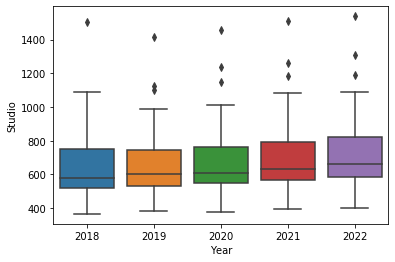

In [19]:
sns.boxplot(x = rental_data1_df["Year"], y = rental_data1_df["Studio"])

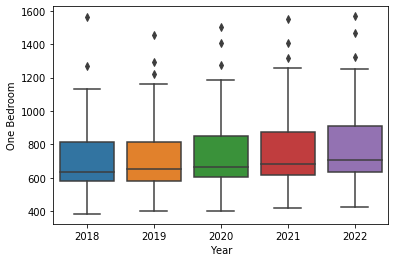

In [20]:
sns.boxplot(x = rental_data1_df["Year"], y = rental_data1_df["One Bedroom"])

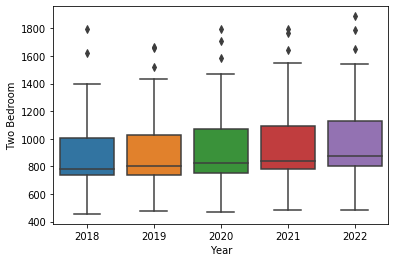

In [21]:
sns.boxplot(x = rental_data1_df["Year"], y = rental_data1_df["Two Bedroom"])

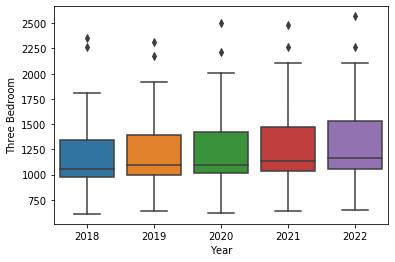

In [22]:
sns.boxplot(x = rental_data1_df["Year"], y = rental_data1_df["Three Bedroom"])

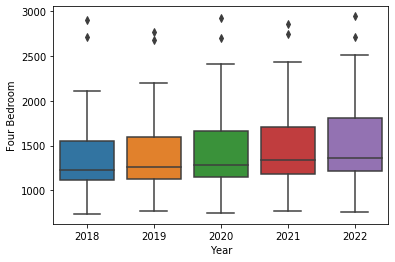

In [23]:
sns.boxplot(x = rental_data1_df["Year"], y = rental_data1_df["Four Bedroom"])

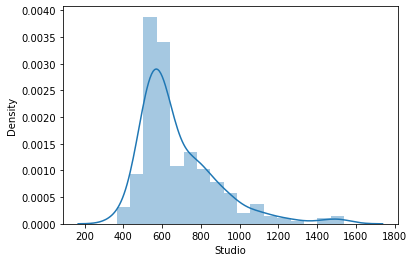

In [24]:
sns.distplot(rental_data1_df['Studio']);

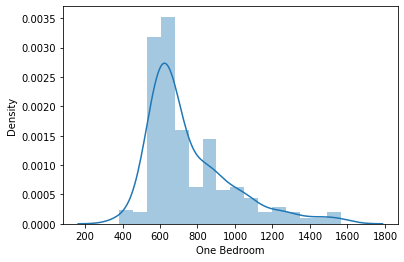

In [25]:
sns.distplot(rental_data1_df['One Bedroom'])

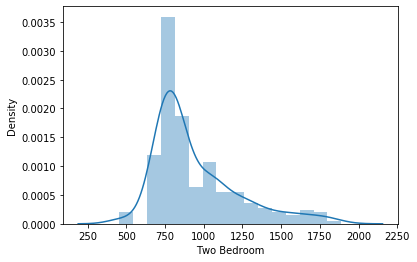

In [26]:
sns.distplot(rental_data1_df['Two Bedroom'])

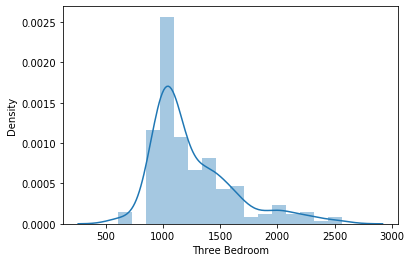

In [27]:
sns.distplot(rental_data1_df['Three Bedroom'])

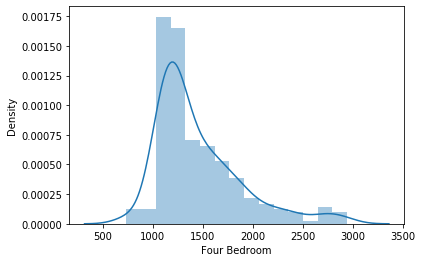

In [28]:
sns.distplot(rental_data1_df['Four Bedroom'])

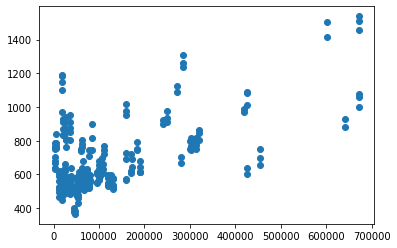

In [29]:
# Plot outputs
plt.scatter(rental_data1_df['Population'],rental_data1_df['Studio'])

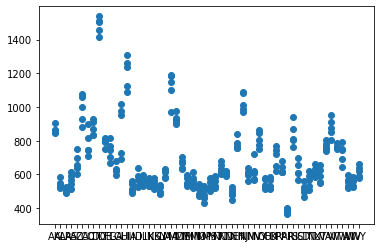

In [30]:
# Plot outputs
plt.scatter(rental_data1_df['State'],rental_data1_df['Studio'])

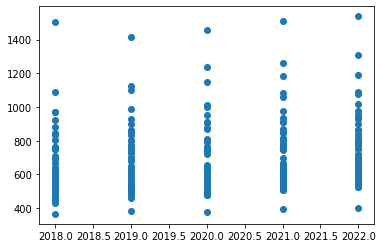

In [31]:
# Plot outputs
plt.scatter(rental_data1_df['Year'],rental_data1_df['Studio'])

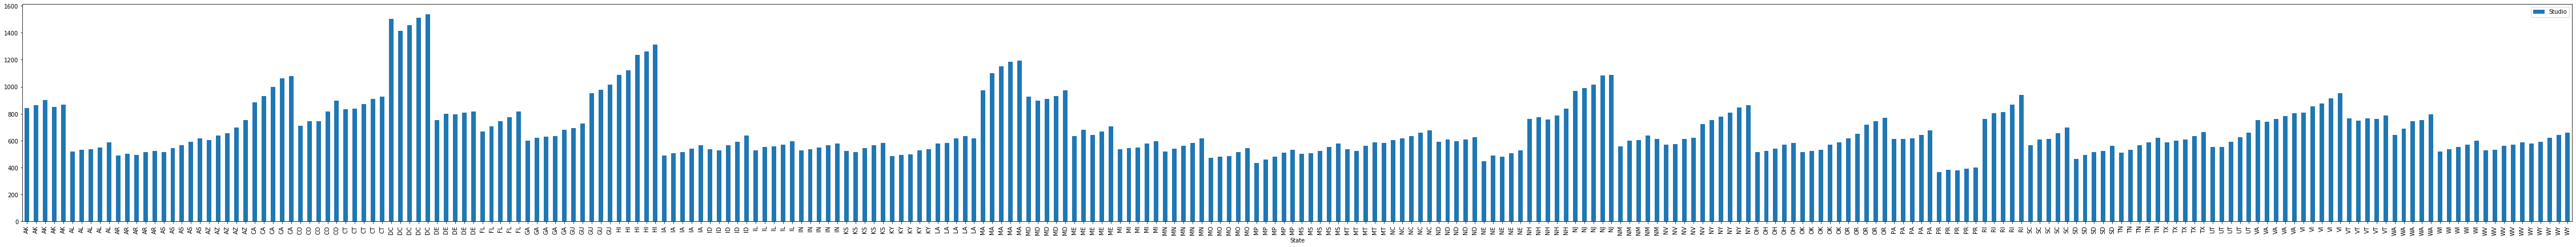

In [32]:
plt.rcParams["figure.figsize"] = (80, 7)
rental_data1_df.plot.bar(x='State', y='Studio')
plt.show()

In [33]:
## POPULATION APPEARS TO BE THE BEST MODERATE PREDICTOR WITH A TREND FROM OUR DATA
# Price appears to gradually increase by year as well, but less Predictive Power (#s)
# A handful of states are above average in price (AK,CA,DC,GU,HI,MA,MD,NJ,NY,RI,VI)
## Also note that regardless of # of bedrooms, distributions of price are about the same

# STUDIO PRICES ANALYSIS

In [34]:
# Prepare data for use in analysis below
X0 = rental_data1_df.iloc[:,7].values
Y0 = rental_data1_df.iloc[:,2].values
Z0 = pd.DataFrame(X0)
W0 = pd.DataFrame(Y0)


In [35]:
print(Z0)
print(W0)

            0
0    24490.72
1    24490.72
2    25467.93
3    25467.93
4    25467.93
..        ...
275  24505.48
276  24505.48
277  25356.52
278  25356.52
279  25356.52

[280 rows x 1 columns]
          0
0    842.86
1    863.97
2    902.24
3    850.97
4    864.45
..      ...
275  577.57
276  591.70
277  621.39
278  640.09
279  659.30

[280 rows x 1 columns]


## TRAIN TEST SPLIT & INITIAL LINEAR REGRESSION ANALYSIS

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train0, X_test0, y_train0, y_test0 = train_test_split(Z0, W0, test_size=0.2, random_state = 1, shuffle= True)

X_train0 = pd.DataFrame(X_train0)
X_test0 = pd.DataFrame(X_test0)
y_train0 = pd.DataFrame(y_train0)
y_test0 = pd.DataFrame(y_test0)


In [37]:
lineReg = LinearRegression()
lineReg.fit(X_train0, y_train0)
lineReg.score(X_test0, y_test0)

0.2939320660031093

### R2 Accuracy Score coming in at 0.2939320660031093 w/ test size of 0.2

In [38]:
# let us check the shape of all of these
print("number of test samples :", X_test0.shape[0])
print("number of training samples:",y_train0.shape[0])

number of test samples : 56
number of training samples: 224


In [39]:
y_pred0 = lineReg.predict(X_test0)

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print('Coefficients: \n', lineReg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test0, y_pred0))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination AKA R2: %.2f'
      % r2_score(y_test0, y_pred0))

Coefficients: 
 [[0.00087483]]
Mean squared error: 26104.90
Coefficient of determination AKA R2: 0.29


### MSE of 26104.90--- No error would be 0, this is a high amount of potential error

## Gradient Boost Regressor used below to increase predictive capability

In [41]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [42]:
XT0 = np.ravel(X_train0)

In [43]:
# Excessive errors, used this line to check data, Commited out to reduce space
# print(X_train)
# print(XT)
# print(y_train)
# print(YT)

In [44]:
YT0 = np.ravel(y_train0)

In [45]:
clf.fit(X_train0,YT0)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [46]:
clf.score(X_test0,y_test0)

0.9539078317625146

## Analysis:
#### We can see that for weak predictions gradient boosting does the trick for the same  
#### train and test data.
#### With GBR (GradientBoostedRegressor) Model we are able to increase the confidence 
#### level to an estimated 0.9539078317625146

#### LOOK ABOVE AND BELOW TO UNDERSTAND STATEMENTS BELOW: 
#### Simple Linear Analysis shows a linear relationship between two or more variables.
#### When we draw this relationship within two variables, we get a straight line. 
#### Quadratic Discriminant Analysis would be similar to Simple Linear Analysis,
#### except that the model allowed polynomial (e.g: x squared) and would produce curves.

## LINEAR REGRESSION, QUADRATIC REGRESSIONS, & KNN REGRESSION

In [47]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train0, y_train0)
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train0, y_train0)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train0, y_train0)

/Users/richelynscott/opt/anaconda3/envs/pythondata/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.14118e-25): result may not be accurate.
  overwrite_a=True).T
/Users/richelynscott/opt/anaconda3/envs/pythondata/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.60644e-36): result may not be accurate.
  overwrite_a=True).T


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('ridge', Ridge())])

In [48]:
# KNN Regression on Studio
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train0, y_train0)

KNeighborsRegressor(n_neighbors=2)

In [49]:
confidencereg = clfreg.score(X_test0, y_test0)
confidencepoly2 = clfpoly2.score(X_test0,y_test0)
confidencepoly3 = clfpoly3.score(X_test0,y_test0)
confidenceknn = clfknn.score(X_test0, y_test0)

In [50]:
print(confidencereg)
#The linear regression confidence
print(confidencepoly2)
#The quadratic regression 2 confidence
print(confidencepoly3)
#The quadratic regression 3 confidence
print(confidenceknn)
#The knn regression confidence 

0.2939320660031093
0.3425768529164398
0.3800495196980026
0.8936304660815191


#### The KNN Regression model provided a higher confidence level vs any of the linear
#### regression analysis (with the exception of the GradientBoosted Regression)
#### the KNN Regression model yielded the highest confidence at 0.8936304660815191
#### On par with the Gradient Boosted Linear Regression from earlier

# One Bedroom Prices Analysis

In [51]:
X1 = rental_data1_df.iloc[:,7].values
Y1 = rental_data1_df.iloc[:,3].values
Z1 = pd.DataFrame(X1)
W1 = pd.DataFrame(Y1)


## TRAIN TEST SPLIT & INITIAL LINEAR REGRESSION ANALYSIS

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X_train1, X_test1, y_train1, y_test1 = train_test_split(Z1, W1, test_size=0.2, random_state = 1, shuffle= True)

X_train1 = pd.DataFrame(X_train1)
X_test1 = pd.DataFrame(X_test1)
y_train1 = pd.DataFrame(y_train1)
y_test1 = pd.DataFrame(y_test1)

lineReg = LinearRegression()
lineReg.fit(X_train1, y_train1)
lineReg.score(X_test1, y_test1)

0.27903918848730547

### R2 Accuracy Score coming in at 0.27903918848730547 w/ test size of 0.2

In [53]:
# let us check the shape of all of these
print("number of test samples :", X_test1.shape[0])
print("number of training samples:",y_train1.shape[0])

number of test samples : 56
number of training samples: 224


In [54]:
y_pred1 = lineReg.predict(X_test1)

In [55]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print('Coefficients: \n', lineReg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test1, y_pred1))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination AKA R2: %.2f'
      % r2_score(y_test1, y_pred1))

Coefficients: 
 [[0.00095075]]
Mean squared error: 33420.34
Coefficient of determination AKA R2: 0.28


### MSE of 33420.34--- No error would be 0, this is a high amount of potential error

## Gradient Boost Regressor used below to increase predictive capability

In [56]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [57]:
XT1 = np.ravel(X_train1)

In [58]:
YT1 = np.ravel(y_train1)

In [59]:
# Excessive errors, used this line to check data, Commited out to reduce space
# print(X_train)
# print(XT)
# print(y_train)
# print(YT)

In [60]:
clf.fit(X_train1,YT1)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [61]:
clf.score(X_test1,y_test1)

0.9630312013553498

## Analysis:
#### We can see that for weak predictions gradient boosting does the trick for the same  
#### train and test data.
#### With GBR (GradientBoostedRegressor) Model we are able to increase the confidence 
#### level to an estimated 0.9630312013553498

#### LOOK ABOVE AND BELOW TO UNDERSTAND STATEMENTS BELOW: 
#### Simple Linear Analysis shows a linear relationship between two or more variables.
#### When we draw this relationship within two variables, we get a straight line. 
#### Quadratic Discriminant Analysis would be similar to Simple Linear Analysis,
#### except that the model allowed polynomial (e.g: x squared) and would produce curves.

In [62]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train1, y_train1)
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train1, y_train1)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train1, y_train1)

/Users/richelynscott/opt/anaconda3/envs/pythondata/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.14118e-25): result may not be accurate.
  overwrite_a=True).T
/Users/richelynscott/opt/anaconda3/envs/pythondata/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.60644e-36): result may not be accurate.
  overwrite_a=True).T


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('ridge', Ridge())])

In [63]:
# KNN Regression on One Bedroom
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train1, y_train1)

KNeighborsRegressor(n_neighbors=2)

In [64]:
confidencereg = clfreg.score(X_test1, y_test1)
confidencepoly2 = clfpoly2.score(X_test1,y_test1)
confidencepoly3 = clfpoly3.score(X_test1,y_test1)
confidenceknn = clfknn.score(X_test1, y_test1)

In [65]:
print(confidencereg)
#The linear regression confidence
print(confidencepoly2)
#The quadratic regression 2 confidence
print(confidencepoly3)
#The quadratic regression 3 confidence
print(confidenceknn)
#The knn regression confidence 

0.27903918848730547
0.3115405577424176
0.35998870444409137
0.8955947178777434


#### The KNN Regression model provided a higher confidence level vs any of the linear
#### regression analysis (with the exception of the GradientBoosted Regression)
#### the KNN Regression model yielded the highest confidence at 0.8955947178777434
#### On par with the Gradient Boosted Linear Regression from earlier

# Two Bedroom Prices Analysis

In [66]:
X2 = rental_data1_df.iloc[:,7].values
Y2 = rental_data1_df.iloc[:,4].values
Z2 = pd.DataFrame(X2)
W2 = pd.DataFrame(Y2)

## TRAIN TEST SPLIT & INITIAL LINEAR REGRESSION ANALYSIS

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X_train2, X_test2, y_train2, y_test2 = train_test_split(Z2, W2, test_size=0.2, random_state = 1, shuffle= True)

X_train2 = pd.DataFrame(X_train2)
X_test2 = pd.DataFrame(X_test2)
y_train2 = pd.DataFrame(y_train2)
y_test2 = pd.DataFrame(y_test2)

lineReg = LinearRegression()
lineReg.fit(X_train2, y_train2)
lineReg.score(X_test2, y_test2)

0.2395514997256385

### R2 Accuracy Score coming in at 0.2395514997256385 w/ test size of 0.2


In [68]:
# let us check the shape of all of these
print("number of test samples :", X_test2.shape[0])
print("number of training samples:",X_train2.shape[0])

number of test samples : 56
number of training samples: 224


In [69]:
y_pred2 = lineReg.predict(X_test2)

In [70]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print('Coefficients: \n', lineReg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test2, y_pred2))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination AKA R2: %.2f'
      % r2_score(y_test2, y_pred2))

Coefficients: 
 [[0.00111837]]
Mean squared error: 50603.26
Coefficient of determination AKA R2: 0.24


### MSE of 50603.26--- No error would be 0, this is a high amount of potential error

## Gradient Boost Regressor used below to increase predictive capability

In [71]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [72]:
XT2 = np.ravel(X_train2)

In [73]:
YT2 = np.ravel(y_train2)

In [74]:
# Excessive errors, used this line to check data, Commited out to reduce space
# print(X_train)
# print(XT)
# print(y_train)
# print(YT)

In [75]:
# X_train.shape

In [76]:
# YT.shape  #####NEED TO COME BACK AND TROUBLESHOOT FOR ALL THESE MISMATCHED

In [77]:
clf.fit(X_train2,YT2)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [78]:
clf.score(X_test2,y_test2)

0.9605207584487291

## Analysis:
#### We can see that for weak predictions gradient boosting does the trick for the same  
#### train and test data.
#### With GBR (GradientBoostedRegressor) Model we are able to increase the confidence 
#### level to an estimated 0.9605207584487291

#### LOOK ABOVE AND BELOW TO UNDERSTAND STATEMENTS BELOW: 
#### Simple Linear Analysis shows a linear relationship between two or more variables.
#### When we draw this relationship within two variables, we get a straight line. 
#### Quadratic Discriminant Analysis would be similar to Simple Linear Analysis,
#### except that the model allowed polynomial (e.g: x squared) and would produce curves.

## LINEAR REGRESSION, QUADRATIC REGRESSIONS, & KNN REGRESSION

In [79]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train2, y_train2)
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train2, y_train2)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train2, y_train2)

/Users/richelynscott/opt/anaconda3/envs/pythondata/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.14118e-25): result may not be accurate.
  overwrite_a=True).T
/Users/richelynscott/opt/anaconda3/envs/pythondata/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.60644e-36): result may not be accurate.
  overwrite_a=True).T


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('ridge', Ridge())])

In [80]:
# KNN Regression on Studio
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train2, y_train2)

KNeighborsRegressor(n_neighbors=2)

In [81]:
confidencereg = clfreg.score(X_test2, y_test2)
confidencepoly2 = clfpoly2.score(X_test2,y_test2)
confidencepoly3 = clfpoly3.score(X_test2,y_test2)
confidenceknn = clfknn.score(X_test2, y_test2)

In [82]:
print(confidencereg)
#The linear regression confidence
print(confidencepoly2)
#The quadratic regression 2 confidence
print(confidencepoly3)
#The quadratic regression 3 confidence
print(confidenceknn)
#The knn regression confidence 

0.2395514997256385
0.26342251394737815
0.3179592707003438
0.8941936247712863


#### The KNN Regression model provided a higher confidence level vs any of the linear
#### regression analysis (with the exception of the GradientBoosted Regression)
#### the KNN Regression model yielded the highest confidence at 0.8941936247712863
#### On par with the Gradient Boosted Linear Regression from earlier

# Three Bedroom Prices Analysis

In [83]:
X3 = rental_data1_df.iloc[:,7].values
Y3 = rental_data1_df.iloc[:,5].values
Z3 = pd.DataFrame(X3)
W3 = pd.DataFrame(Y3)

## TRAIN TEST SPLIT & INITIAL LINEAR REGRESSION ANALYSIS

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X_train3, X_test3, y_train3, y_test3 = train_test_split(Z3, W3, test_size=0.2, random_state = 1, shuffle= True)

X_train3 = pd.DataFrame(X_train3)
X_test3 = pd.DataFrame(X_test3)
y_train3 = pd.DataFrame(y_train3)
y_test3 = pd.DataFrame(y_test3)

lineReg = LinearRegression()
lineReg.fit(X_train3, y_train3)
lineReg.score(X_test3, y_test3)

0.2625539605400581

### R2 Accuracy Score coming in at 0.2625539605400581 w/ test size of 0.2

In [85]:
# let us check the shape of all of these
print("number of test samples :", X_test3.shape[0])
print("number of training samples:",X_train3.shape[0])

number of test samples : 56
number of training samples: 224


In [86]:
y_pred3 = lineReg.predict(X_test3)

In [87]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print('Coefficients: \n', lineReg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test3, y_pred3))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination AKA R2: %.2f'
      % r2_score(y_test3, y_pred3))

Coefficients: 
 [[0.00153084]]
Mean squared error: 80760.97
Coefficient of determination AKA R2: 0.26


### MSE of 80760.97--- No error would be 0, this is a high amount of potential error

## Gradient Boost Regressor used below to increase predictive capability

In [88]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [89]:
XT3 = np.ravel(X_train3)

In [90]:
YT3 = np.ravel(y_train3)

In [91]:
# Excessive errors, used this line to check data, Commited out to reduce space
# print(X_train)
# print(XT)
# print(y_train)
# print(YT)

In [92]:
# X_train.shape

In [93]:
# YT.shape  #####NEED TO COME BACK AND TROUBLESHOOT FOR ALL THESE MISMATCHED

In [94]:
clf.fit(X_train3,YT3)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [95]:
clf.score(X_test3,y_test3)

0.9607824502851617

## Analysis:
#### We can see that for weak predictions gradient boosting does the trick for the same  
#### train and test data.
#### With GBR (GradientBoostedRegressor) Model we are able to increase the confidence 
#### level to an estimated 0.9607824502851617

#### LOOK ABOVE AND BELOW TO UNDERSTAND STATEMENTS BELOW: 
#### Simple Linear Analysis shows a linear relationship between two or more variables.
#### When we draw this relationship within two variables, we get a straight line. 
#### Quadratic Discriminant Analysis would be similar to Simple Linear Analysis,
#### except that the model allowed polynomial (e.g: x squared) and would produce curves.

## LINEAR REGRESSION, QUADRATIC REGRESSIONS, & KNN REGRESSION

In [96]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train3, y_train3)
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train3, y_train3)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train3, y_train3)

/Users/richelynscott/opt/anaconda3/envs/pythondata/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.14118e-25): result may not be accurate.
  overwrite_a=True).T
/Users/richelynscott/opt/anaconda3/envs/pythondata/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.60644e-36): result may not be accurate.
  overwrite_a=True).T


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('ridge', Ridge())])

In [97]:
# KNN Regression on Studio
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train3, y_train3)

KNeighborsRegressor(n_neighbors=2)

In [98]:
confidencereg = clfreg.score(X_test3, y_test3)
confidencepoly2 = clfpoly2.score(X_test3,y_test3)
confidencepoly3 = clfpoly3.score(X_test3,y_test3)
confidenceknn = clfknn.score(X_test3, y_test3)

In [99]:
print(confidencereg)
#The linear regression confidence
print(confidencepoly2)
#The quadratic regression 2 confidence
print(confidencepoly3)
#The quadratic regression 3 confidence
print(confidenceknn)
#The knn regression confidence 

0.2625539605400581
0.27437301130481406
0.3101961841527384
0.8965056645747143


#### The KNN Regression model provided a higher confidence level vs any of the linear
#### regression analysis (with the exception of the GradientBoosted Regression)
#### the KNN Regression model yielded the highest confidence at 0.8965056645747143
#### On par with the Gradient Boosted Linear Regression from earlier

# Four Bedroom Prices Analysis

In [100]:
X4 = rental_data1_df.iloc[:,7].values
Y4 = rental_data1_df.iloc[:,6].values
Z4 = pd.DataFrame(X4)
W4 = pd.DataFrame(Y4)

In [101]:
print(Z4)

            0
0    24490.72
1    24490.72
2    25467.93
3    25467.93
4    25467.93
..        ...
275  24505.48
276  24505.48
277  25356.52
278  25356.52
279  25356.52

[280 rows x 1 columns]


## TRAIN TEST SPLIT & INITIAL LINEAR REGRESSION ANALYSIS

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X_train4, X_test4, y_train4, y_test4 = train_test_split(Z4, W4, test_size=0.2, random_state = 1, shuffle= True)

X_train4 = pd.DataFrame(X_train4)
X_test4 = pd.DataFrame(X_test4)
y_train4 = pd.DataFrame(y_train4)
y_test4 = pd.DataFrame(y_test4)


In [103]:

lineReg = LinearRegression()
lineReg.fit(X_train4, y_train4)
lineReg.score(X_test4, y_test4)

0.2482299943520181

### R2 Accuracy Score coming in at 0.2482299943520181 w/ test size of 0.2

In [104]:
# let us check the shape of all of these
print("number of test samples :", X_test4.shape[0])
print("number of training samples:",X_train4.shape[0])

number of test samples : 56
number of training samples: 224


In [105]:
y_pred4 = lineReg.predict(X_test4)

In [106]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print('Coefficients: \n', lineReg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test4, y_pred4))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination AKA R2: %.2f'
      % r2_score(y_test4, y_pred4))

Coefficients: 
 [[0.00185303]]
Mean squared error: 121368.84
Coefficient of determination AKA R2: 0.25


### MSE of 121368.84--- No error would be 0, this is a high amount of potential error

## Gradient Boost Regressor used below to increase predictive capability

In [107]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [108]:
XT4 = np.ravel(X_train4)

In [109]:
YT4 = np.ravel(y_train4)

In [110]:
# Excessive errors, used this line to check data, Commited out to reduce space
# print(X_train)
# print(XT)
# print(y_train)
# print(YT)

In [111]:
# X_train.shape

In [112]:
# YT.shape  #####NEED TO COME BACK AND TROUBLESHOOT FOR ALL THESE MISMATCHED

In [113]:
clf.fit(X_train4,YT4)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [114]:
clf.score(X_test4,y_test4)

0.9519053227283946

## Analysis:
#### We can see that for weak predictions gradient boosting does the trick for the same  
#### train and test data.
#### With GBR (GradientBoostedRegressor) Model we are able to increase the confidence 
#### level to an estimated 0.9519053227283946

#### LOOK ABOVE AND BELOW TO UNDERSTAND STATEMENTS BELOW: 
#### Simple Linear Analysis shows a linear relationship between two or more variables.
#### When we draw this relationship within two variables, we get a straight line. 
#### Quadratic Discriminant Analysis would be similar to Simple Linear Analysis,
#### except that the model allowed polynomial (e.g: x squared) and would produce curves.

## LINEAR REGRESSION, QUADRATIC REGRESSIONS, & KNN REGRESSION

In [115]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train4, y_train4)
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train4, y_train4)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train4, y_train4)

/Users/richelynscott/opt/anaconda3/envs/pythondata/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.14118e-25): result may not be accurate.
  overwrite_a=True).T
/Users/richelynscott/opt/anaconda3/envs/pythondata/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.60644e-36): result may not be accurate.
  overwrite_a=True).T


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('ridge', Ridge())])

In [116]:
# KNN Regression on Studio
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train4, y_train4)

KNeighborsRegressor(n_neighbors=2)

In [117]:
confidencereg = clfreg.score(X_test4, y_test4)
confidencepoly2 = clfpoly2.score(X_test4,y_test4)
confidencepoly3 = clfpoly3.score(X_test4,y_test4)
confidenceknn = clfknn.score(X_test4, y_test4)

In [118]:
print(confidencereg)
#The linear regression confidence
print(confidencepoly2)
#The quadratic regression 2 confidence
print(confidencepoly3)
#The quadratic regression 3 confidence
print(confidenceknn)
#The knn regression confidence 

0.2482299943520181
0.26127929110574355
0.28428274276284193
0.8980434928191611


#### The KNN Regression model provided a higher confidence level vs any of the linear
#### regression analysis (with the exception of the GradientBoosted Regression)
#### the KNN Regression model yielded the highest confidence at 0.8980434928191611
#### On par with the Gradient Boosted Linear Regression from earlier